In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 1. Đọc dữ liệu. Xem thông tin dữ liệu với head, info.

In [2]:
canxi = pd.read_excel(io='Du_lieu_cung_cap/canxi.xlsx', engine='openpyxl')
canxi.head()

,response_number,knowledge_score,calcium_intake
0,1,1.0,0.450
1,2,4.2,1.050
2,3,3.8,0.900
3,4,1.5,0.525
4,5,2.2,0.710


In [3]:
canxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   response_number  20 non-null     int64  
 1   knowledge_score  20 non-null     float64
 2   calcium_intake   20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


### 2. Vẽ biểu đồ phân phối tần suất của knowledge_score.

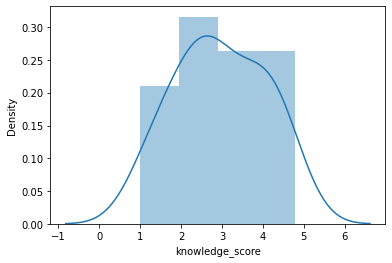

In [4]:
sns.distplot(canxi.knowledge_score)
plt.show()

Nhận xét: knowledge_score tuân theo phân phối chuẩn

### 3. Thực hiện các thống kê cơ bản cho knowledge_score và calcium_intake (mean, median, mode, max, min, range)

In [5]:
temp = canxi[['knowledge_score','calcium_intake']]
temp.head()

,knowledge_score,calcium_intake
0,1.0,0.450
1,4.2,1.050
2,3.8,0.900
3,1.5,0.525
4,2.2,0.710


In [6]:
temp.agg(['mean', 'median', 'max', 'min'])

,knowledge_score,calcium_intake
mean,2.96,0.7851
median,2.90,0.7990
max,4.80,1.0850
min,1.00,0.4500


In [7]:
# range knowledge_score
np.ptp(temp.knowledge_score.values)

3.8

In [8]:
# range calcium_intake
np.ptp(temp.calcium_intake.values)

0.635

In [9]:
scipy.stats.mode(temp.knowledge_score.values)

ModeResult(mode=array([2.2]), count=array([2]))

In [10]:
scipy.stats.mode(temp.calcium_intake.values)

ModeResult(mode=array([0.45]), count=array([1]))

### 4. Cho biết các giá trị ở phân vị thứ 20, 35, 65 và 90 của calcium_intake. Biểu diễn phân vị và giá trị tương ứng trên biểu đồ.

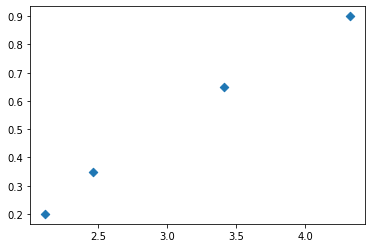

(None, array([2.12 , 2.465, 3.41 , 4.32 ]))

In [11]:
percentiles = np.array([20, 35, 65, 90])
x = np.percentile(temp.knowledge_score.values, percentiles)
plt.scatter(x, percentiles/100, marker='D')
plt.show(), x

### 5. Vẽ boxplot cho knowledge_score và cho calcium_intake.

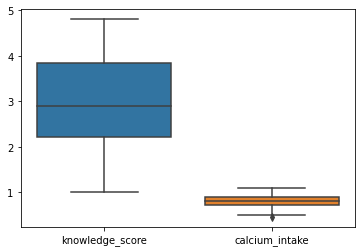

In [12]:
sns.boxplot(data=temp)
plt.show()

### 6. Tìm phương sai (variance) của knowledge_score.

In [13]:
np.var(canxi.knowledge_score)

1.1643999999999999

### 7. Tìm độ lệch chuẩn (Standard deviation) của calcium_intake.

In [ ]:
canxi.calcium_intake.std()

0.1743903365260937

### 8. Tìm độ xiên (Skewness) của knowledge_score. Nhận xét kết quả.

In [15]:
canxi.knowledge_score.skew()

-0.028794959699455863

Nhận xét: Phân phối lệch phải.

### 9. Tìm độ nhọn (Kurtosis) của knowledge_score. Nhận xét kết quả.

In [16]:
canxi.knowledge_score.kurtosis()

-1.0046176484575784

Nhận xét: phân phối tập trung kém mức bình thường, đỉnh của đồ thị hình chuông của phân phối thấp và tù hơn, với 2 đuôi dài hơn.

### 10. Cho biết số lượng mẫu có giá trị calxium_intake lớn hơn 0.75, xác suất các mẫu có calxium_intake lớn hơn 0.75 là bao nhiêu? Nhận xét.

In [17]:
z = (0.75 - canxi.calcium_intake.mean())/canxi.calcium_intake.std()
z

-0.20127262037107177

In [ ]:
# xác suất các mẫu có calxium_intake lớn hơn 0.75 P(x>0.75) = 1-P(X<0.75)
1 - scipy.stats.norm.cdf(z)

0.579757294876672

Nhận xét: từ xác xuất vừa tính ta có thể suy luận được có khoảng 57.9% người có chỉ số calxium_intake lớn hơn 0.75 trong tập dữ liệu

### 11. Tìm xác suất của P(0.65 ≤ calcium_intake ≤ 0.85). Nhận xét.

In [19]:
z_065 = (0.65 - canxi.calcium_intake.mean())/canxi.calcium_intake.std()
z_065

-0.7746988892345255

In [20]:
z_085 = (0.85 - canxi.calcium_intake.mean())/canxi.calcium_intake.std()
z_085

0.3721536484923819

In [ ]:
# P(0.65 < X < 0.85) = P(X<0.85)-P(X<0.65)
scipy.stats.norm.cdf(z_085) - scipy.stats.norm.cdf(z_065)

0.42585196895980504

Nhận xét: từ xác xuất vừa tính ta có thể suy luận được có khoảng 42.6% người có chỉ số 0.65 <= calxium_intake <= 0.85 trong tập dữ liệu

### 12. Vẽ biểu đồ thể hiện mối quan hệ giữa knowledge_score và calcium_intake. Nhận xét.

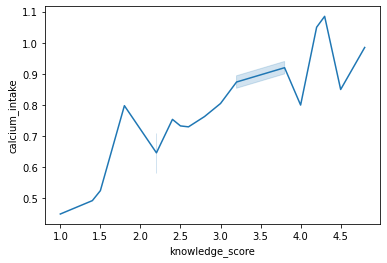

In [22]:
### 12. Vẽ biểu đồ thể hiện mối quan hệ giữa knowledge_score và calcium_intake. Nhận xét.
sns.lineplot(x=canxi.knowledge_score, y=canxi.calcium_intake)
plt.show()

Nhận xét: Khi knowledge_score tăng thì calcium_intake cũng có xu hướng tăng theo.

### 13. Tính giá trị tương quan giữa knowledge_score và calcium_intake.

In [23]:
temp.corr()

,knowledge_score,calcium_intake
knowledge_score,1.000000,0.882255
calcium_intake,0.882255,1.000000


### 14. Giả sử có thể dựa trên knowledge_score có thể dự đoán được calcium_intake thì hãy quy thành phương trình y = mx + b (với y là calcium_intake và x là knowledge_score).

In [24]:
X = canxi.knowledge_score.values
X[0:5]

array([1. , 4.2, 3.8, 1.5, 2.2])

In [25]:
Y = canxi.calcium_intake.values

In [26]:
def gradient_descent_2(alpha, X, y, es):
   
    
  
    m = X.shape[0] # số dòng
    X = np.c_[np.ones(m), X] # [[1 x0],[1 x1], [1  x2], ...]
    theta = np.ones(2) # giả sử theta bắt đầu là: theta = [1, 1]
    
   
    theta_lst = []
    hypothesis = X.dot(theta) 
    loss = hypothesis - y
    J = np.sum(loss ** 2) / (2 * m)
    
    while J > es:        
        # hypothesis = theta0 + theta1.x
        hypothesis = X.dot(theta) 
        loss = hypothesis - y 
        
        J = np.sum(loss ** 2) / (2 * m)  # J là hàm chi phí bình phương tối thiểu (squares cost function)
        theta0_prime = np.sum(loss)/m # tính đạo hàm theo theta0
        theta1_prime = np.sum(loss * X[:,1])/m # tính đạo hàm theo theta1
         
        gradient = np.array([theta0_prime, theta1_prime])
        theta = theta - alpha * gradient  # di chuyển đến gần điểm cực tiểu địa phương
        theta_lst.append(theta)
        
    return pd.DataFrame({'theta':theta_lst})

In [27]:
from scipy.linalg import inv

In [28]:
theta = gradient_descent_2(1e-4, X, Y, 0.005).iloc[-1,0]

In [29]:
Y_0 = np.c_[np.ones(len(X)), X].dot(np.array([theta[0], theta[1]]))
Y_0

array([0.63497403, 0.91083396, 0.87635147, 0.67807715, 0.73842151,
       0.82462774, 0.89359272, 0.66945652, 0.772904  , 0.82462774,
       0.87635147, 0.76428338, 0.9625577 , 0.79014524, 0.73842151,
       0.93669583, 0.70393902, 0.75566275, 0.80738649, 0.91945459])

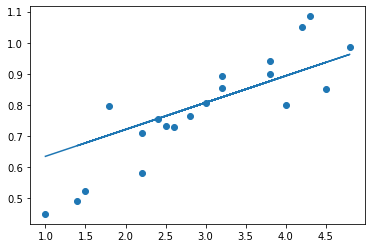

In [30]:
plt.plot(X, Y_0)
plt.scatter(X,Y)
plt.show()

In [31]:
# Cho knowledge_score lần lượt là 2.0, 2.7, 3.5, 4.4 thì calcium_intake lần lượt là bao nhiêu?
x = np.array([2.0, 2.7, 3.5, 4.4])
x = np.c_[np.ones(len(x)), x]
x

array([[1. , 2. ],
       [1. , 2.7],
       [1. , 3.5],
       [1. , 4.4]])

In [32]:
y = x.dot(np.array([theta[0], theta[1]]))
y

array([0.72118026, 0.78152462, 0.8504896 , 0.92807521])

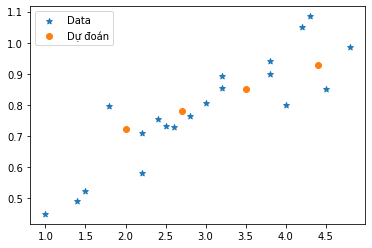

In [37]:
plt.scatter(X, Y, marker='*', label='Data')
plt.scatter(x[:,1],y , label='Dự đoán')
plt.legend()
plt.show()